**Question**:  Can a convolutional neural network (CNN) accurately classify images of clothing into one of the 10 Fashion-MNIST categories?

In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#Load the Fashion-MNIST Dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


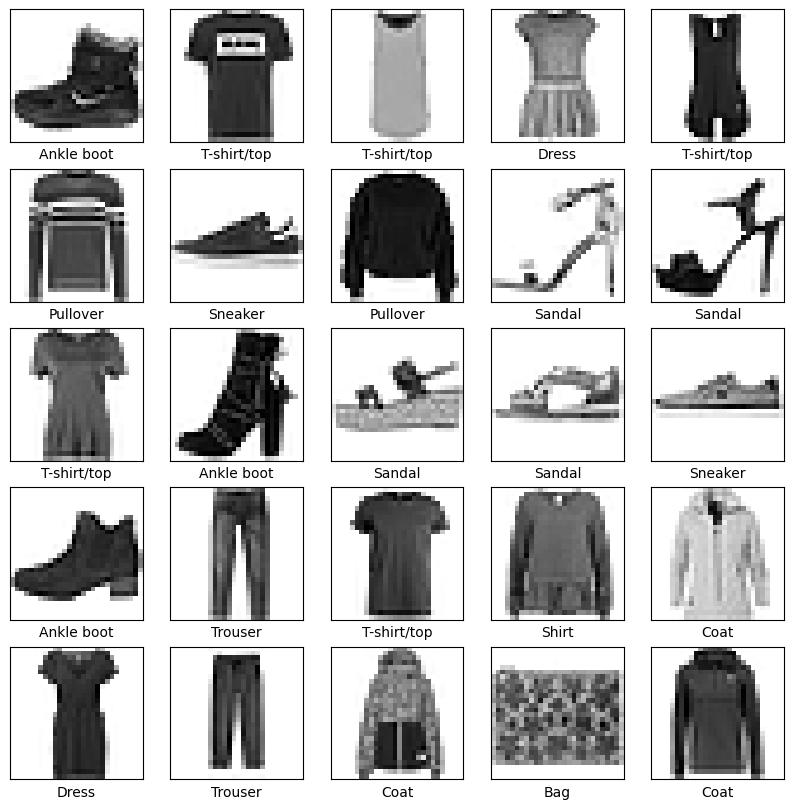

In [3]:
#Explore the Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
#Data Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0


In [5]:
#Reshape for CNN
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [6]:
#Build the CNN Model
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.7735 - loss: 0.6200 - val_accuracy: 0.8762 - val_loss: 0.3429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.8879 - loss: 0.3088 - val_accuracy: 0.8940 - val_loss: 0.2860
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9063 - loss: 0.2552 - val_accuracy: 0.9051 - val_loss: 0.2592
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9181 - loss: 0.2206 - val_accuracy: 0.9009 - val_loss: 0.2647
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9290 - loss: 0.1922 - val_accuracy: 0.9100 - val_loss: 0.2546
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9366 - loss: 0.1677 - val_accuracy: 0.9149 - val_loss: 0.2403
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9462 - loss: 0.1438 - val_accuracy: 0.9146 - val_loss: 0.2460
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9538 -

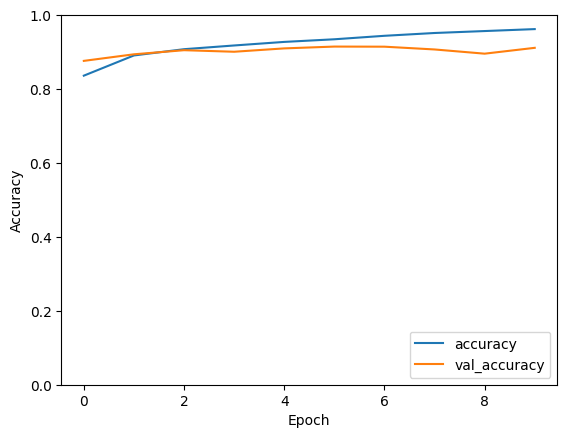

In [9]:
#Visualize the Training Results
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


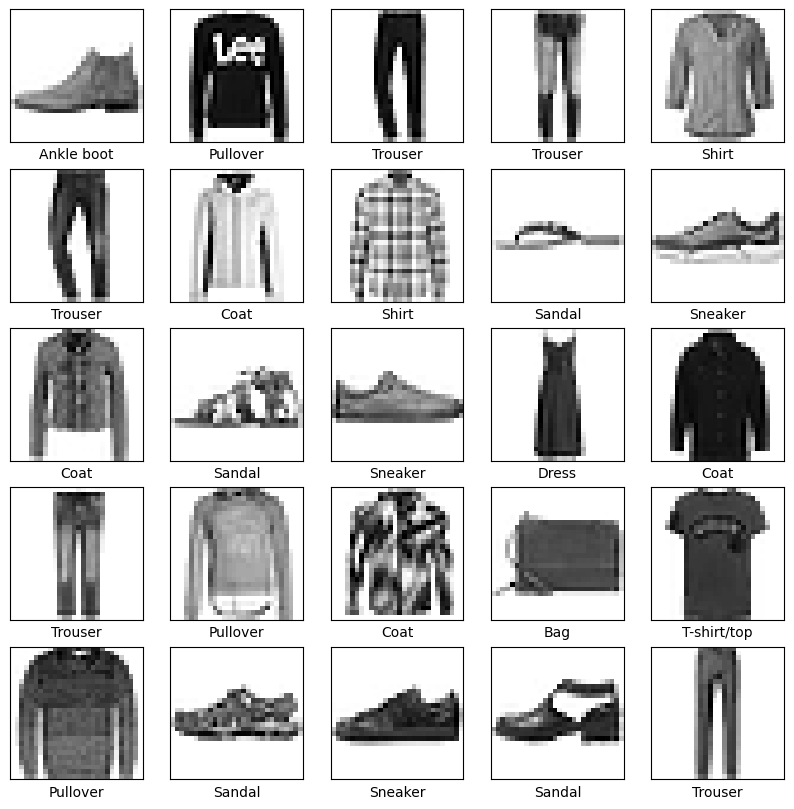

In [10]:
#Make Predictions
predictions = model.predict(x_test)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()


## 1. Model Performance:


*   The model achieved a **training accuracy** of up to **96.53%** and a **validation accuracy** of **91.15%** which indicates that the model is learning well and generalising reasonably to unseen data.
*   The **training loss** reduced consistently to **0.0948** which shows that the model is fitting well to the training data.
* The **validation loss** ended at **0.2959**. This suggests the model has room for improvement in generalization.

## 2. Accuracy Trends:

* The accuracy and validation accuracy curves showed a consistent increase with each epoch.
* The gap between the training and validation accuracy is relatively small, which indicates minimal overfitting. However, the slight dip in validation accuracy towards the last epochs may signal early signs of overfitting.

## 3. Visual Inspection of Predictions:

* The visualization of the predicted labels against the actual images demonstrated that most predictions were correct.
* Misclassifications were more likely in images with ambiguity or those that closely resemble other categories (eg. Coats and Shirts).